# Portfolio for SDSPhD20

This notebook contains the exercises and assignments to be answered in a portfolio for the PhD course "Social Data Science: An Applied Introduction to Machine Learning" at Aalborg University, November 2020.

Each day of the course you are given an hour to work on a portfolio with the possibility of sparring with the course lecturers. 

You are expected to attempt to solve the various assignments using the methods and tools taught during the course. Answers should be combined into a notebook (fx by adding answers to a copy of this one). 

**Note:** You are not expected to attempt to solve every single assignment. Note the different requirements for each day.

#### How to hand in your portfolio notebooks

You can hand in your portfolio notebooks in two ways:

- Saving your notebooks in a GitHub repository and then sending the repository URL to the course organizer (Kristian Kjelmann)
- Sharing your notebooks directly with the course organizer (Kristian Kjelmann) in Google Colab.

Kristian’s e-mail: kgk@adm.aau.dk

# Portfolio assignments for Tuesday (unsupervised and supervised machine learning)

**Requirement**: Work on solutions for *either* "unsupervised machine learning with penguins" or "clustering" *and* *either* "supervised machine learning with penguins" or "employee turnover".

*In this case, the solutions are provided for* **unsupervised machine learning with penguins** *and* **employee turnover**.



---

## Unsupervised machine learning with penguins

The palmer penguin dataset is excellent for EDA and UML. It contains different measures for 3 species of closely related penguins from several islands in Antarctica.

Let's have a look:

Penguin datast: https://github.com/allisonhorst/palmerpenguins
![penguins](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

![penguin_beaks](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png)

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Create a new dataset where you scale all numeric values with the standardscaler.
4. Perform a PCA analysis
5. Investigate the explained variance of the components... do we see an 'elbow'?
5. Plot the data in the space of the first two components. Maybe color it by species or island. What pattern do we see?
6. Inspect the correlation between the components. Which variables are they mostly associated with?

#### Data and libraries

In [1]:
# standard packaging

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # standard plotting library
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [2]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")



```
`# This is formatted as code`
```

In the following, I'll be doing some standard data inspection to get more familiar with the 'penguins' data frame.


In [3]:
# Data inspection
penguins.info()
penguins.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [4]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
penguins = penguins.dropna()

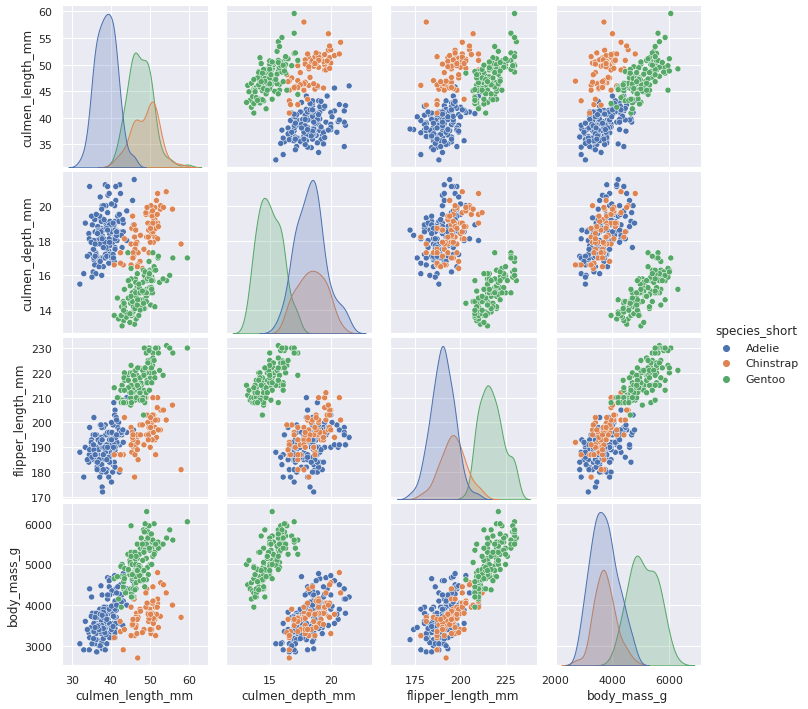

In [6]:
sns.pairplot(penguins, hue='species_short')

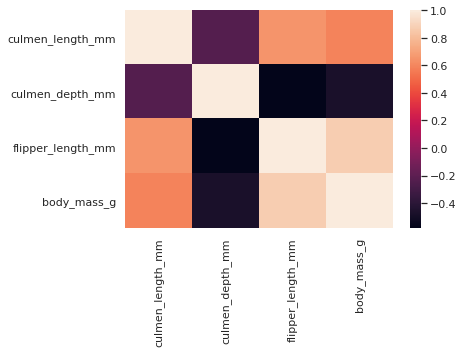

In [7]:
sns.heatmap(penguins.corr())

From here onwards, the data will be scaled:

In [8]:
# Transfer the (categorical) outcome of interest to the index (PCA only works with numerical data)
penguins.set_index(['species_short','island','sex'], inplace=True)
#penguins.reset_index(0,inplace=False)

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [10]:
# Let's standard-scale our data
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins)

In [11]:
# What are mean and Sd now?
pd.DataFrame(penguins_scaled, columns=penguins.columns).describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,3.340000e+02,3.340000e+02,3.340000e+02,3.340000e+02
mean,4.055306e-16,-4.829803e-16,3.024859e-16,-4.015417e-16
std,1.001500e+00,1.001500e+00,1.001500e+00,1.001500e+00
min,-2.181505e+00,-2.066442e+00,-2.072325e+00,-1.877800e+00
25%,-8.242902e-01,-7.941526e-01,-7.867179e-01,-8.200995e-01
50%,9.274707e-02,7.100443e-02,-2.867596e-01,-1.979229e-01
75%,8.401325e-01,7.834867e-01,8.560021e-01,7.275647e-01
max,2.862200e+00,2.208451e+00,2.141609e+00,2.601872e+00


Now that the data has been scaled I execute PCA

In [12]:
# Instantiate a PCA object
model = PCA() # Number of components needs to be defined. We just for illustration take about half of the numbers of features

In [13]:
# Fitr the model
model.fit(penguins_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
# Fit and transform the data
penguins_reduced = model.transform(penguins_scaled)

Inspecting the results, first with an EVR plot, and then with scatter plots of the components.

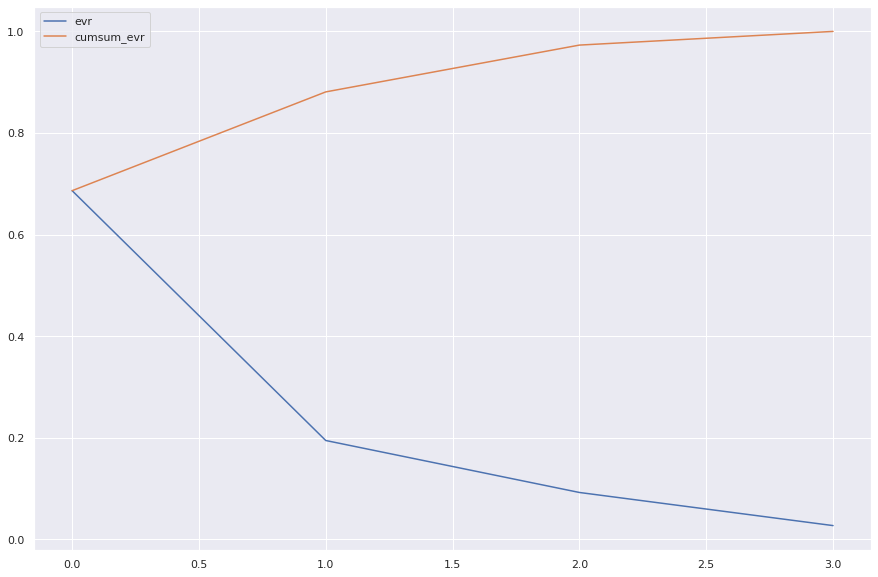

In [15]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

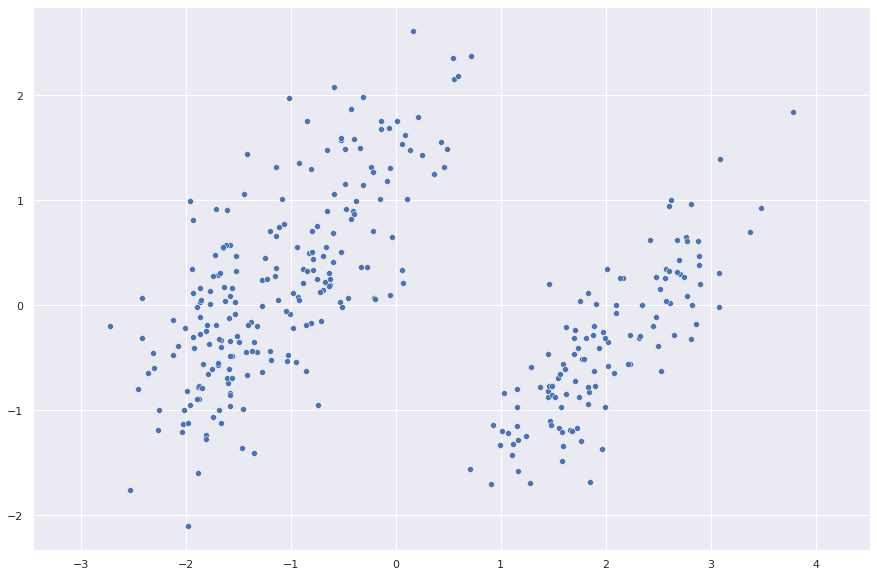

In [16]:
# Scatter plot of the first 2 componentws
sns.scatterplot(x = penguins_reduced[:,0], y = penguins_reduced[:,1])
plt.axis('equal')
plt.show()

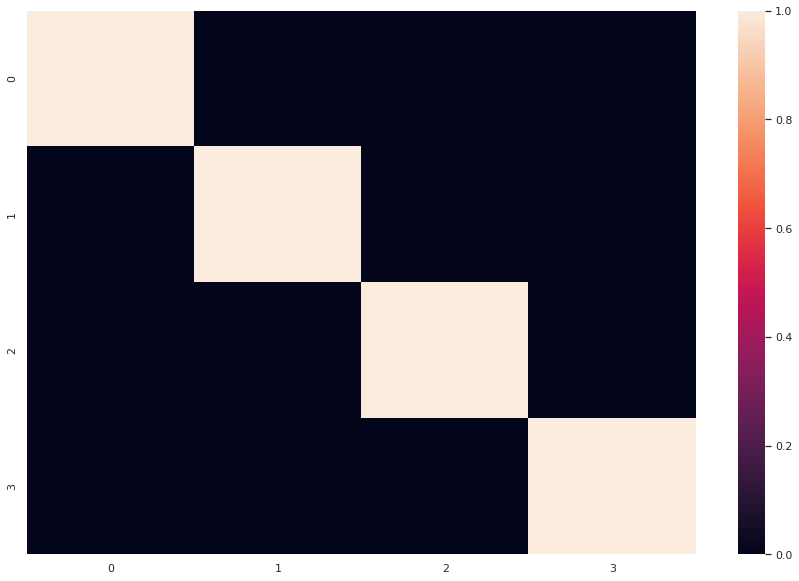

In [17]:
sns.heatmap(pd.DataFrame(penguins_reduced).corr())

Now reorganizing....

In [18]:
# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]
second_pc = model.components_[1,:]

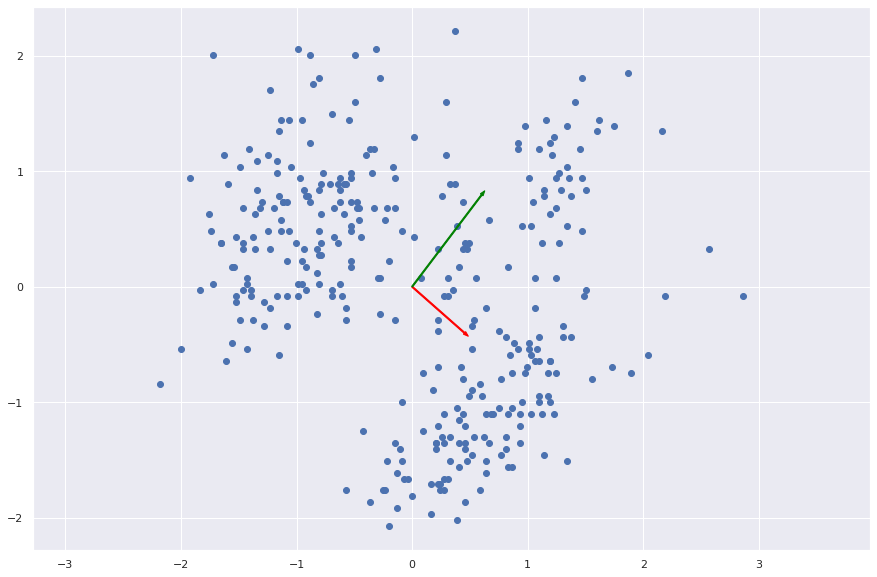

In [19]:
# Make a scatter plot of the untransformed points
plt.scatter(penguins_scaled[:,0], penguins_scaled[:,1])

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[0], second_pc[1], color='green', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

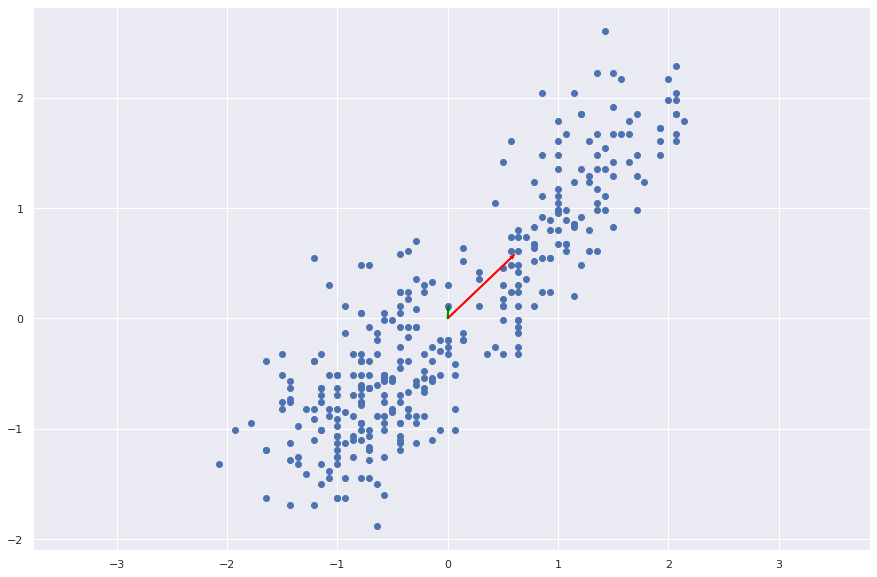

In [20]:
# Make a scatter plot of the untransformed points
plt.scatter(penguins_scaled[:,2], penguins_scaled[:,3])

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[2], first_pc[3], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[2], second_pc[3], color='green', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

In [21]:
pcscores = pd.DataFrame(penguins_reduced)
loadings = pd.DataFrame(model.components_, columns=penguins.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

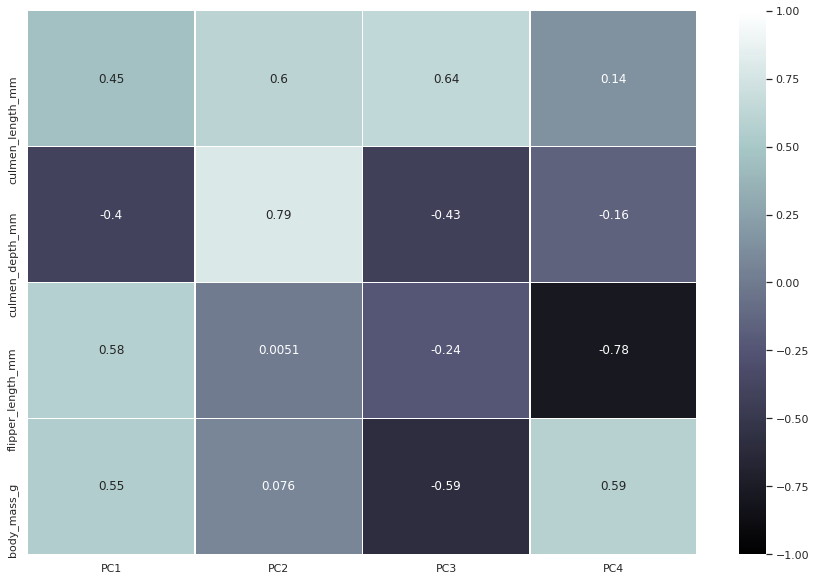

In [22]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

## Employee turnover

### The assignment

In the repo, you will find a dataset describing employee turnover in a company.

https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/turnover.csv

The dataset contains data collected in an employee survey and enriched with HR data.

The variable `churn` tells us if the employee left the company in the past 3 months. The other variables are collected

#### Classification

Try to predict `churn` using a classification pipeline (perhaps add some simple exploration of the data first)

#### Regression
Try to predict the number of weekly average hours worked.

**Before** working with the data, you should use `pd.get_dummies` to get dummies for categorical variables.

---

First, let's start by loading and inspecting the data...


In [23]:
turnover = pd.read_csv('https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/turnover.csv')
turnover.info()
turnover.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [24]:
turnover_encod = pd.get_dummies(turnover, columns=['department','salary'])

In [25]:
turnover_encod.info()

turnover_encod.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction            14999 non-null  float64
 1   evaluation              14999 non-null  float64
 2   number_of_projects      14999 non-null  int64  
 3   average_montly_hours    14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   work_accident           14999 non-null  int64  
 6   churn                   14999 non-null  int64  
 7   promotion               14999 non-null  int64  
 8   department_IT           14999 non-null  uint8  
 9   department_RandD        14999 non-null  uint8  
 10  department_accounting   14999 non-null  uint8  
 11  department_hr           14999 non-null  uint8  
 12  department_management   14999 non-null  uint8  
 13  department_marketing    14999 non-null  uint8  
 14  department_product_mng  14999 non-null

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [26]:
# Select the (independent) features that we are going to use to train the model
X = turnover_encod.loc[:,turnover_encod.columns != 'churn']
X.info() #...used to check if the right columns were selected, all is good 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction            14999 non-null  float64
 1   evaluation              14999 non-null  float64
 2   number_of_projects      14999 non-null  int64  
 3   average_montly_hours    14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   work_accident           14999 non-null  int64  
 6   promotion               14999 non-null  int64  
 7   department_IT           14999 non-null  uint8  
 8   department_RandD        14999 non-null  uint8  
 9   department_accounting   14999 non-null  uint8  
 10  department_hr           14999 non-null  uint8  
 11  department_management   14999 non-null  uint8  
 12  department_marketing    14999 non-null  uint8  
 13  department_product_mng  14999 non-null  uint8  
 14  department_sales        14999 non-null

In [27]:
# Define the dependant variabel / target to predict (world region)
y = turnover_encod.churn
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: churn, Length: 14999, dtype: int64

Transforming, pre-processing and splitting

In [28]:
# Load and instantiate a LabelEncoder that will turn our text labels (regions into indices)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [29]:
# Transform labels into indices by passing y to the encoder
y_enc = encoder.fit_transform(y)

In [30]:
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
# Apply the scaler to our X-features
X_scaled = scaler.fit_transform(X)

In [32]:
# Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size = 0.2, random_state = 42)

Training and evaluating various models

In [33]:
# Import modules that we are going to use for all models

# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score

# Import Classification Report for later evaluatoion of performance
from sklearn.metrics import classification_report

Logistic Regression

In [34]:
# Import and instantiate the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

[0.78583333 0.7925     0.78833333 0.79916667 0.78032514]


In [35]:
# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

0.7843333333333333


So, here the overall accuracy is at 78,4 %. Maybe it would be useful to evaluate it differently.

In [36]:
# Performance evaluation using the classification_report

target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred)) #Print out the report

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.57      0.34      0.42       706

    accuracy                           0.78      3000
   macro avg       0.69      0.63      0.65      3000
weighted avg       0.76      0.78      0.76      3000



The logistic regresion is onot performing too well predicting positive/true churn. 

In [37]:
!pip uninstall -qq mlxtend -y

In [38]:
# For that we need to install an updated version of the MLxtend library (it will make plotting of the confusion matrix easy)
!pip install -qq -U mlxtend

In [39]:
# Import the confusion matrix plotter module
from mlxtend.plotting import plot_confusion_matrix

# We will also import sklearns confusion matrix module that will make it easy to produce a confusion matrix
# It's actually just a cross-tab of predicted vs. real values
from sklearn.metrics import confusion_matrix

(<Figure size 1080x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f38b1f52588>)

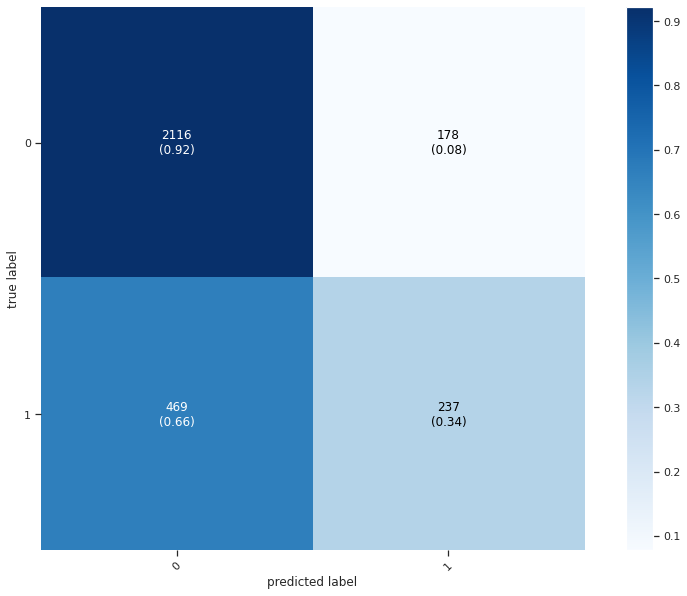

In [40]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                hide_spines = True,
                                class_names=target_names)

The model struggled with identifying churn...

Let's try random forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

[0.98916667 0.98875    0.98875    0.99083333 0.98957899]
0.987


In [42]:
# Performance evaluation using the classification_report

target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred)) #Print out the report

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.98      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



(<Figure size 1080x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f38b06b7cf8>)

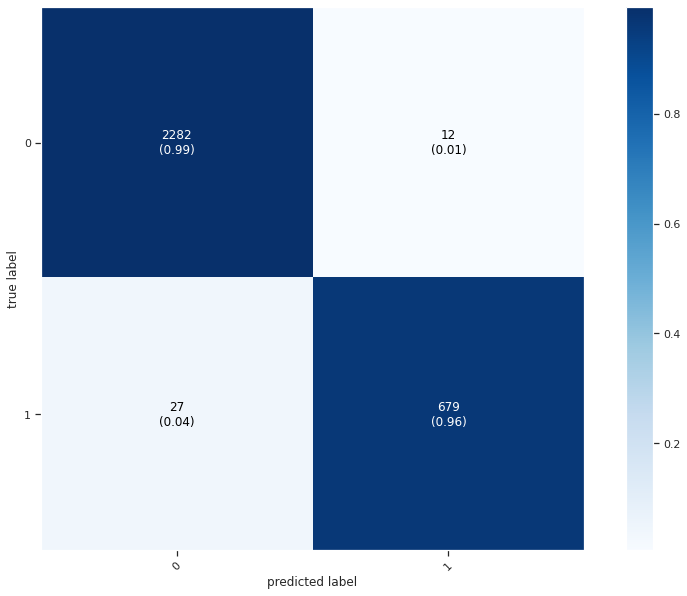

In [43]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names = target_names)

This seems a lot better...

Now instead, we can try to predict the number of monthly average hours worked.


## Predicting the worked hours

In the following we are going to predict the average worked hours per month. The inputs into the model will be the same that we already used for predicting churn. We are only going to change the dependant variable. In this case the data is supplied as a monthly average (if we want to see it as a weekly aggregate, we could divide this by ~4.345, which is the average number of weeks in a month).

In [44]:
# picking a different outcome variable

y_reg = turnover_encod.average_montly_hours

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


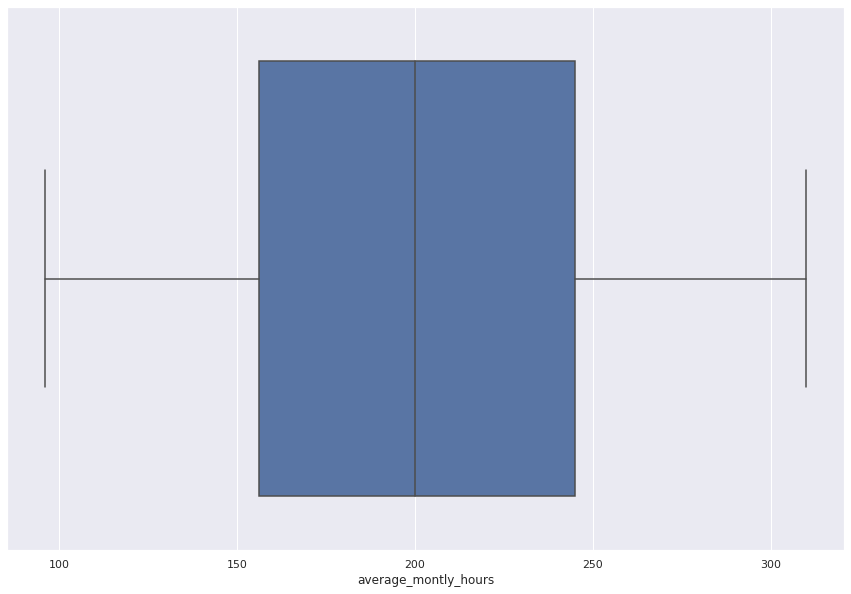

In [45]:
sns.boxplot(y_reg)

In [46]:
# We need to creat new train / test splits here - as the nomad_score was not part of the previous split.

X_train, X_test, y_train, y_test, data_train, data_test = train_test_split(X_scaled, y_reg, turnover_encod, test_size = 0.2, random_state = 42)

In [47]:
# Import and instantiate the baseline model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set / This score is not accacy but a R^2
print(model.score(X_test, y_test))

1.0


It would appear that the model predicts fairly well the average number of  hours worked.

In [48]:
from sklearn.metrics import mean_squared_error
import numpy as np

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


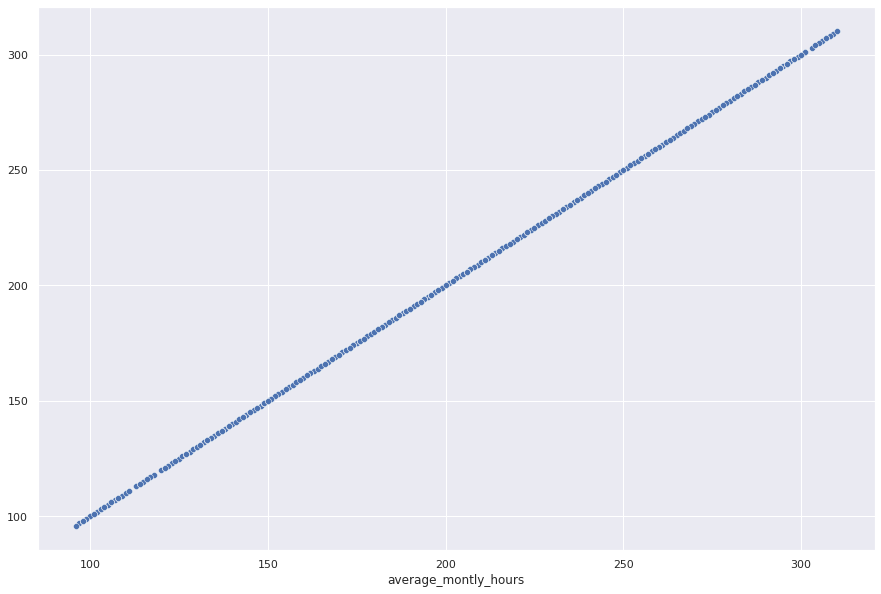

In [49]:
# We can also inspect our results visually
y_pred = model.predict(X_test)

sns.scatterplot(y_test,y_pred)

In [50]:
np.sqrt(mean_squared_error(y_test, y_pred))

6.246959838127386e-14

In [51]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 6723 to 14346
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction            3000 non-null   float64
 1   evaluation              3000 non-null   float64
 2   number_of_projects      3000 non-null   int64  
 3   average_montly_hours    3000 non-null   int64  
 4   time_spend_company      3000 non-null   int64  
 5   work_accident           3000 non-null   int64  
 6   churn                   3000 non-null   int64  
 7   promotion               3000 non-null   int64  
 8   department_IT           3000 non-null   uint8  
 9   department_RandD        3000 non-null   uint8  
 10  department_accounting   3000 non-null   uint8  
 11  department_hr           3000 non-null   uint8  
 12  department_management   3000 non-null   uint8  
 13  department_marketing    3000 non-null   uint8  
 14  department_product_mng  3000 non-nul

In [52]:
import altair as alt

In [53]:
data_test['average_montly_hours_pred'] = y_pred

alt.Chart(data_test).mark_circle(size=60).encode(
    x='average_montly_hours',
    y='average_montly_hours_pred',
    color=alt.Color('churn', scale=alt.Scale(scheme='category10')),
    tooltip=['time_spend_company','evaluation','number_of_projects','satisfaction']
).interactive()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


alt.Chart(...)

Interestingly, churn along with lower satisfaction rates seem to be in line with more work hours, on average.